# SkinLesion - Desafio ISIC 2019
## EfficientNet
Pré-treinadas com o ImageNet.

### Imports

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.metrics import CategoricalAccuracy

In [2]:
# Open dataframes containing the images for training, validation and test
train_df = pd.read_csv(r"./dataframes/isic2019_train.csv")
aug_df = pd.read_csv(r"./dataframes/isic2019_train_aug1.csv")
val_df = pd.read_csv(r"./dataframes/isic2019_val.csv")
test_df = pd.read_csv(r"./dataframes/isic2019_test.csv")

### Informações sobre os *datasets* de treino, validação e teste

In [3]:
# Train dataframe WITHOUT data augmentation
print(train_df.info(), end='\n\n')
aug_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17731 entries, 0 to 17730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       17731 non-null  object 
 1   MEL         17731 non-null  float64
 2   NV          17731 non-null  float64
 3   BCC         17731 non-null  float64
 4   AK          17731 non-null  float64
 5   BKL         17731 non-null  float64
 6   DF          17731 non-null  float64
 7   VASC        17731 non-null  float64
 8   SCC         17731 non-null  float64
 9   UNK         17731 non-null  float64
 10  lesion      17731 non-null  object 
 11  image_path  17731 non-null  object 
 12  cc_path     17731 non-null  object 
dtypes: float64(9), object(4)
memory usage: 1.8+ MB
None



image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK  \
0              ISIC_0062259  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
1  ISIC_0006021_downsampled  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
2              ISIC_0073039  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0   
3              ISIC_0071603  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0   
4              ISIC_0033780  0.0  0.0  0.0  0.0  0.0  1.0   0.0  0.0  0.0   

  lesion                                    image_path  
0     NV              ./img_shades_cc/ISIC_0062259.jpg  
1     NV  ./img_shades_cc/ISIC_0006021_downsampled.jpg  
2    BKL              ./img_shades_cc/ISIC_0073039.jpg  
3    BCC              ./img_shades_cc/ISIC_0071603.jpg  
4     DF              ./img_shades_cc/ISIC_0033780.jpg

In [4]:
# Augmented train dataframe
print(aug_df.info(), end='\n\n')
aug_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26450 entries, 0 to 26449
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       26450 non-null  object 
 1   MEL         26450 non-null  float64
 2   NV          26450 non-null  float64
 3   BCC         26450 non-null  float64
 4   AK          26450 non-null  float64
 5   BKL         26450 non-null  float64
 6   DF          26450 non-null  float64
 7   VASC        26450 non-null  float64
 8   SCC         26450 non-null  float64
 9   UNK         26450 non-null  float64
 10  lesion      26450 non-null  object 
 11  image_path  26450 non-null  object 
dtypes: float64(9), object(3)
memory usage: 2.4+ MB
None



image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK  \
0              ISIC_0062259  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
1  ISIC_0006021_downsampled  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
2              ISIC_0073039  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0   
3              ISIC_0071603  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0   
4              ISIC_0033780  0.0  0.0  0.0  0.0  0.0  1.0   0.0  0.0  0.0   

  lesion                                    image_path  
0     NV              ./img_shades_cc/ISIC_0062259.jpg  
1     NV  ./img_shades_cc/ISIC_0006021_downsampled.jpg  
2    BKL              ./img_shades_cc/ISIC_0073039.jpg  
3    BCC              ./img_shades_cc/ISIC_0071603.jpg  
4     DF              ./img_shades_cc/ISIC_0033780.jpg

In [5]:
# Validation dataframe
print(val_df.info(), end='\n\n')
val_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5066 entries, 0 to 5065
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       5066 non-null   object 
 1   MEL         5066 non-null   float64
 2   NV          5066 non-null   float64
 3   BCC         5066 non-null   float64
 4   AK          5066 non-null   float64
 5   BKL         5066 non-null   float64
 6   DF          5066 non-null   float64
 7   VASC        5066 non-null   float64
 8   SCC         5066 non-null   float64
 9   UNK         5066 non-null   float64
 10  lesion      5066 non-null   object 
 11  image_path  5066 non-null   object 
dtypes: float64(9), object(3)
memory usage: 475.1+ KB
None



image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK lesion  \
0  ISIC_0029598  0.0  0.0  0.0  0.0  0.0  0.0   0.0  1.0  0.0    SCC   
1  ISIC_0054298  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0     NV   
2  ISIC_0031407  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0    BCC   
3  ISIC_0055665  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    MEL   
4  ISIC_0025318  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0     NV   

                         image_path  
0  ./img_shades_cc/ISIC_0029598.jpg  
1  ./img_shades_cc/ISIC_0054298.jpg  
2  ./img_shades_cc/ISIC_0031407.jpg  
3  ./img_shades_cc/ISIC_0055665.jpg  
4  ./img_shades_cc/ISIC_0025318.jpg

In [6]:
# Test dataframe
print(test_df.info(), end='\n\n')
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       2534 non-null   object 
 1   MEL         2534 non-null   float64
 2   NV          2534 non-null   float64
 3   BCC         2534 non-null   float64
 4   AK          2534 non-null   float64
 5   BKL         2534 non-null   float64
 6   DF          2534 non-null   float64
 7   VASC        2534 non-null   float64
 8   SCC         2534 non-null   float64
 9   UNK         2534 non-null   float64
 10  lesion      2534 non-null   object 
 11  image_path  2534 non-null   object 
dtypes: float64(9), object(3)
memory usage: 237.7+ KB
None



image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK  \
0  ISIC_0013383_downsampled  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
1              ISIC_0070201  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0   
2              ISIC_0027725  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
3              ISIC_0000167  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
4  ISIC_0014692_downsampled  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   

  lesion                                    image_path  
0     NV  ./img_shades_cc/ISIC_0013383_downsampled.jpg  
1    BCC              ./img_shades_cc/ISIC_0070201.jpg  
2     NV              ./img_shades_cc/ISIC_0027725.jpg  
3    MEL              ./img_shades_cc/ISIC_0000167.jpg  
4     NV  ./img_shades_cc/ISIC_0014692_downsampled.jpg

### Geradores dos tensores

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 128

train_dataGen = ImageDataGenerator(rescale=1./255)

train_generator = train_dataGen.flow_from_dataframe(
    dataframe=aug_df, x_col='image_path', class_mode='raw', seed=31415,
    y_col=['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'],
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE)

val_generator = train_dataGen.flow_from_dataframe(
    dataframe=val_df, x_col='image_path', class_mode='raw', seed=31415,
    y_col=['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'],
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE)

test_generator = train_dataGen.flow_from_dataframe(
    dataframe=test_df, x_col='image_path', class_mode='raw', seed=31415,
    y_col=['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'],
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE)

Found 26450 validated image filenames.
Found 5066 validated image filenames.
Found 2534 validated image filenames.


### Dependências
#### Métricas

In [8]:
import tensorflow_addons as tfa

micro_f1 = tfa.metrics.F1Score(
    num_classes=8,
    average='micro',
    name="Micro F1",
)

macro_f1 = tfa.metrics.F1Score(
    num_classes=8,
    average='macro',
    name="Macro F1",
)

### Carregamento da arquitetura e treinamento das camadas superiores

In [9]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers

# Load EfficientNet pre-trained w/ ImageNet
base_model = EfficientNetB0(include_top=False, weights="imagenet")

# Rebuild top
avg = layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output)
norm = layers.BatchNormalization()(avg)
dropout = layers.Dropout(0.2, name="top_dropout")(norm)
output = layers.Dense(8, activation="softmax", name="pred")(dropout)

model = tf.keras.Model(base_model.input, output, name="EfficientNetB0")

# Freeze the pretrained weights
for layer in base_model.layers:
    layer.trainable = False

# Compile
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

metrics = [CategoricalAccuracy(name='Categorical Accuracy'),
           micro_f1, macro_f1]

model.compile(optimizer=optimizer, loss="categorical_crossentropy",
              metrics=metrics)

#### Carregamento dos melhores pesos das camadas superiores

In [9]:
# Load previous best weights
model.load_weights('./models/efficientNetB2_best')

In [10]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', np.unique(train_df.lesion), train_df.lesion)
class_weights = dict(enumerate(class_weights))

print(class_weights)

{0: 3.651359143327842, 1: 0.9528697334479793, 2: 1.206518780620577, 3: 13.271706586826348, 4: 0.7002764612954187, 5: 0.2459359742565468, 6: 5.037215909090909, 7: 12.521892655367232}


/home/pedro/anaconda3/envs/skinLesion2/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=['AK' 'BCC' 'BKL' 'DF' 'MEL' 'NV' 'SCC' 'VASC'], y=0         NV
1         NV
2        BKL
3        BCC
4         DF
        ... 
17726    BCC
17727     NV
17728     NV
17729    MEL
17730     NV
Name: lesion, Length: 17731, dtype: object as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [11]:
# Top layers training
# Train with callback (early stopping)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

checkpoint = tf.keras.callbacks.ModelCheckpoint("./models_bak/efficientNetB0_top", monitor='val_loss', verbose=1,
                                                save_best_only=True, save_weights_only=True, mode='min')

# Epochs - min:8; max:80
history = model.fit(train_generator, validation_data=val_generator, epochs=50, class_weight=class_weights,
                    callbacks=[early_stop, checkpoint])

Epoch 1/50
164/207 [======================>.......] - ETA: 45s - loss: 6.8462 - Categorical Accuracy: 0.1651 - Micro F1: 0.1651 - Macro F1: 0.0836  

KeyboardInterrupt: 

### Treinamento de todas as camadas

In [13]:
model.load_weights('./models/efficientNetB2_best')

# Unfreeze all layer's pretrained weights
for layer in model.layers:
    layer.trainable = True

# Reduce learning rate to to 10^(-4)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer, loss="categorical_crossentropy",
              metrics=["accuracy", AUC(name="AUC"), Recall(name="Recall"), specificity, Precision(name="Precision"),
                       f1_score])

In [14]:
# Train with callback (early stopping)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Save model's best weights based on validation loss
checkpoint = tf.keras.callbacks.ModelCheckpoint("./models/efficientNetB2_best", monitor='val_loss', verbose=1,
                                                save_best_only=True, save_weights_only=True, mode='min')

# Epochs - min:8; max:80
history = model.fit(train_generator, validation_data=val_generator, epochs=50, class_weight=class_weights,
                    callbacks=[early_stop, checkpoint])

Epoch 1/50
1100/1100 [==============================] - 780s 699ms/step - loss: 3.8932 - accuracy: 0.3386 - AUC: 0.7311 - Recall: 0.1226 - specificity: 0.9895 - Precision: 0.5293 - f1_score: 0.1874 - val_loss: 1.9256 - val_accuracy: 0.2448 - val_AUC: 0.7175 - val_Recall: 0.0908 - val_specificity: 0.9865 - val_Precision: 0.4904 - val_f1_score: 0.1532

In [16]:
# Predicts labels
test_predictions = model.predict(test_generator, verbose=1)

80/80 [==============================] - 35s 439ms/step

In [17]:
from sklearn.metrics import classification_report

print(classification_report(test_generator.labels.argmax(1), test_predictions.argmax(1), zero_division=0))

              precision    recall  f1-score   support

           0       0.19      0.27      0.22       453
           1       0.52      0.48      0.50      1288
           2       0.14      0.10      0.12       332
           3       0.04      0.10      0.06        87
           4       0.10      0.02      0.04       262
           5       0.00      0.00      0.00        24
           6       0.02      0.04      0.02        25
           7       0.02      0.03      0.02        63

    accuracy                           0.31      2534
   macro avg       0.13      0.13      0.12      2534
weighted avg       0.33      0.31      0.31      2534



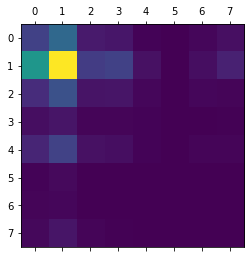

In [18]:
import matplotlib.pyplot as plt

# Confusion matrix
confusion = tf.math.confusion_matrix(test_generator.labels.argmax(1), test_predictions.argmax(1))

plt.matshow(confusion)

#### Salvar/Carregar modelo ou pesos

In [ ]:
# Save model's current weights (CAUTION: defaults to overwrite)
# model.save_weights('./models/efficientNetB3_topTrained')

# Load model (the whole model, including architecture and weights)
# model = tf.keras.models.load_model('./models/efficientNetB2_topTrained.tf')

# Load model weights
# model.load_weights('./models/efficientNetB3_topTrained')

### Resultados EfficientNet B0
**Batch size alterado p/ 32!**

#### 1o teste

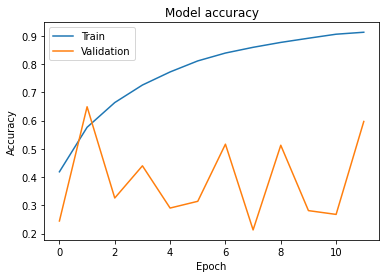

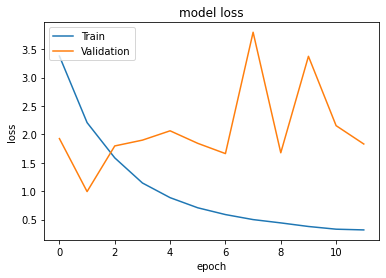

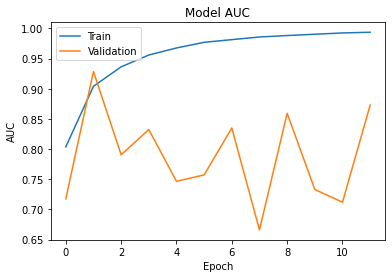

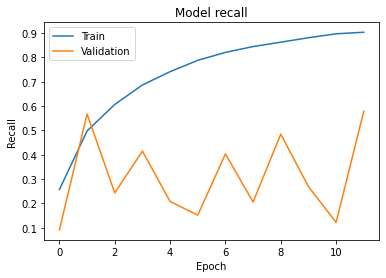

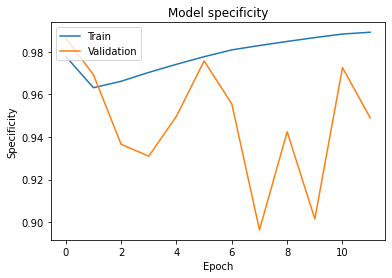

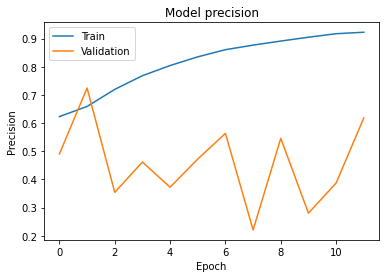

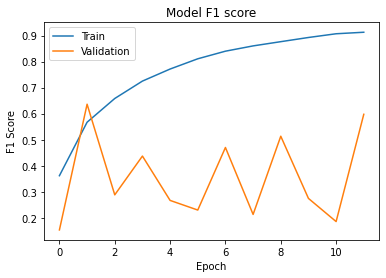

In [22]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for auc
plt.plot(history.history['AUC'])
plt.plot(history.history['val_AUC'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for recall
plt.plot(history.history['Recall'])
plt.plot(history.history['val_Recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for specificity
plt.plot(history.history['specificity'])
plt.plot(history.history['val_specificity'])
plt.title('Model specificity')
plt.ylabel('Specificity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for precision
plt.plot(history.history['Precision'])
plt.plot(history.history['val_Precision'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for f1_score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('Model F1 score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()